In [1]:
import numpy as np
import netCDF4 as nc
import pyfesom2 as pf
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cmocean

In [8]:
exps = ['tran20-32k-sed10',
        'tran20-32k-sed20',
        'tran20-32k-sed30',
        'tran20-32k-new04',
       ]

datas = [ '/home/a/a270075/ba0989/awiesm2.5/experiments-2/'+i+'/restart/pism/'+i+'_pismr_restart_1169000101-1169991231.nc'  for i in exps[:] ]

datas

['/home/a/a270075/ba0989/awiesm2.5/experiments-2/tran20-32k-sed10/restart/pism/tran20-32k-sed10_pismr_restart_1169000101-1169991231.nc',
 '/home/a/a270075/ba0989/awiesm2.5/experiments-2/tran20-32k-sed20/restart/pism/tran20-32k-sed20_pismr_restart_1169000101-1169991231.nc',
 '/home/a/a270075/ba0989/awiesm2.5/experiments-2/tran20-32k-sed30/restart/pism/tran20-32k-sed30_pismr_restart_1169000101-1169991231.nc',
 '/home/a/a270075/ba0989/awiesm2.5/experiments-2/tran20-32k-new04/restart/pism/tran20-32k-new04_pismr_restart_1169000101-1169991231.nc']

[   0 1000 2000 3000 4000]
pro4_params:  {'ellps': 'WGS84', 'proj': 'stere', 'lat_0': 90, 'lon_0': -45, 'x_0': 0.0, 'y_0': 0.0, 'lat_ts': 70.0}
(600, 600)
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
(600, 600)
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
(600, 600)
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
(600, 600)
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]


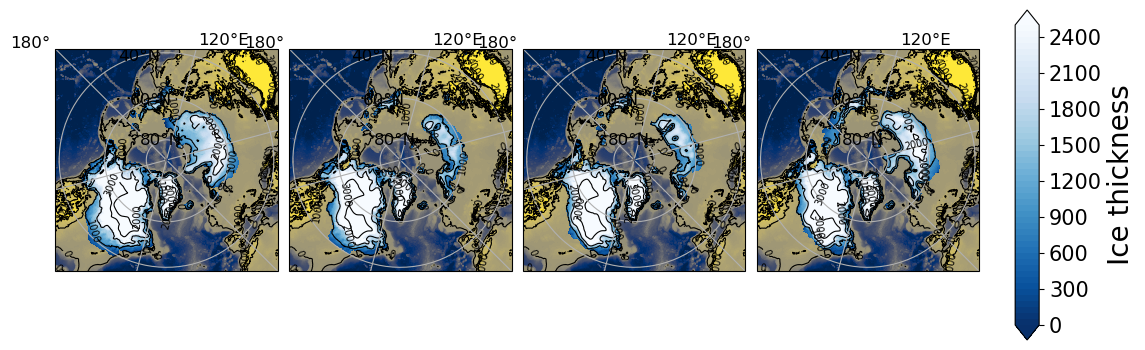

In [12]:
### definition for plots
minval = 0
maxval = 2500
nbreaks = 51

breaks = np.linspace(minval,maxval,nbreaks)
color = plt.cm.Blues_r  #jet #viridis   #  #ocean  #cubehelix viridis  #
color2 = plt.cm.cividis #   #gray #gist_earth #cividis #gray_r
breaks2 = np.linspace(-5000,3000,81)
breaks3 = np.arange(0,5000,1000)
print(breaks3)


projection = ccrs.NorthPolarStereo(central_longitude= -45,true_scale_latitude=70.,globe=None)
projection2 = ccrs.NorthPolarStereo(central_longitude= -45,true_scale_latitude=70.,globe=None)

print('pro4_params: ',projection.proj4_params)

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0.05,right=0.82, top=0.95, bottom=0.05, hspace=0.1,wspace=0.05)

for i in range(0, len(exps)):
    with nc.Dataset(datas[i], 'r') as ff:
        thk = ff.variables['thk'][0,:,:]
        topg = ff.variables['topg'][0,:,:]
        print(thk.shape)
        
        x = ff.variables['x'][:] 
        y = ff.variables['y'][:] 

        thknew = np.ma.masked_where(thk<1., thk)
        usurf = thk + topg

    new_extent = [np.min(x), np.max(x), np.max(y), np.min(y)]
    print(new_extent)
    plot_extent = new_extent
    print(plot_extent)

    ax = fig.add_subplot(1,len(exps),i+1, projection=projection2)
    ax.set_extent(plot_extent,projection)
    cs = plt.contourf(x,y, topg, transform=projection,extent=new_extent, extend='both', cmap=color2 , levels=breaks2)  #colors='grey'
    cs2 = plt.contourf(x,y, thknew,transform=projection,extent=new_extent,extend='both',cmap=color,levels=breaks,vmin=minval,vmax=maxval)
    cs3 = plt.contour(x,y,usurf,transform=projection,extent=new_extent, colors='black', levels=breaks3,linewidths=0.8 )
    plt.clabel(cs3,  fontsize=7)
    # ax.set_title(values[i])
    # ax.coastlines()

    # grid lines
    gl = ax.gridlines(draw_labels=True) #, linewidth=2, alpha=0.4, color='k', linestyle=':')
    gl.xlines = True
    gl.ylines = True #False
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180, 60 ))
    gl.ylocator = mticker.FixedLocator(np.arange(0,90, 20 ))
    gl.bottom_labels = False
    #gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'black','rotation':0 } #'weight': 'bold'}
    gl.ylabel_style = {'size': 12, 'color': 'black',  } #'weight': 'bold'}

###### colorbar 
cax = plt.axes([0.85, 0.2,0.02, 0.55])
# cbar = plt.colorbar(cs, cax=cax,orientation='horizontal',fraction=0.05,pad=0.03,  label='Bathymetry (m)')
cbar = plt.colorbar(cs2, cax=cax,orientation='vertical',fraction=0.05,pad=0.03)
cbar.set_label(label='Ice thickness', size=20) #, weight='bold')
cbar.ax.tick_params(labelsize=15)
#fig.text(0.35,0.93,'Ice thickness at 21k',fontsize=20)

plt.savefig('thk.png',bbox_inches='tight',)
# plt.show()
# plt.close()